# Correlations

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
import plotly
import us

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 12)

In [3]:
df = pd.read_csv("../data/Mass Shootings Dataset Ver 2 clean + time.csv", encoding = "ISO-8859-1", parse_dates=["Date"])

In [4]:
df.columns

Index(['S#', 'Title', 'Date', 'Fatalities', 'Injured', 'Total victims',
       'Mental Health Issues', 'Race', 'Gender', 'Latitude', 'Longitude',
       'Cities', 'State', 'Gun law', 'Party affiliation', 'Population',
       'Season', 'DayType', 'Holiday', 'Year', 'Month', 'Day', 'Weekday'],
      dtype='object')

In [5]:
columns = ['Mental Health Issues', 'Race', 'Gender', 'State', 'Gun law', 'Party affiliation',
           'Year', 'Month', 'Day', 'Weekday', 'Season', 'DayType']

In [6]:
def plot_correlation(row, column):
    if len(df[column].unique()) > len(df[row].unique()):
        row, column = column, row
    
    table = pd.pivot_table(df, values='Fatalities', index=row, columns=column, 
                           aggfunc=len, margins=True, fill_value=0)

    table.drop('All', axis=0, inplace=True)
    table.drop('All', axis=1, inplace=True)

    plt.matshow(table)
    plt.yticks(range(len(table.index)), table.index)
    plt.xticks(range(len(table.columns)), table.columns, rotation=90)
    plt.xlabel(column)
    plt.ylabel(row)
    plt.show()

## Exploration

In [7]:
# for row, column in itertools.combinations(columns, 2):   
#     if row != column:
#         plot_correlation(row, column)

## Examples

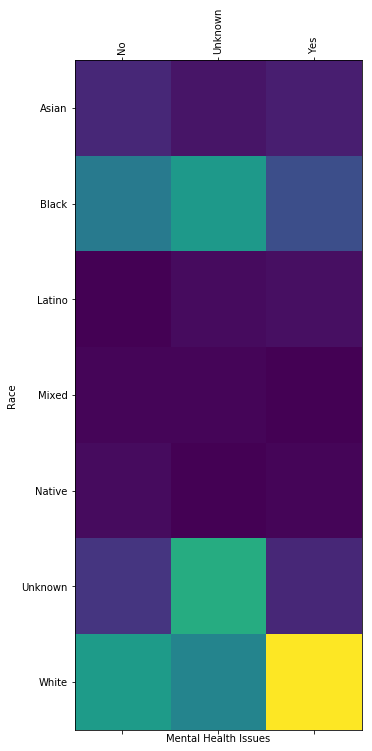

In [8]:
plot_correlation('Mental Health Issues', 'Race')

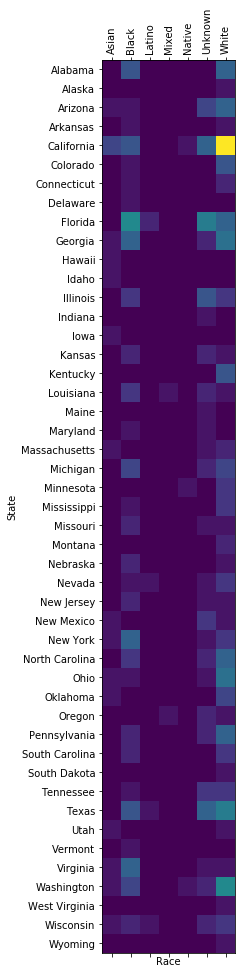

In [9]:
plot_correlation('State', 'Race')

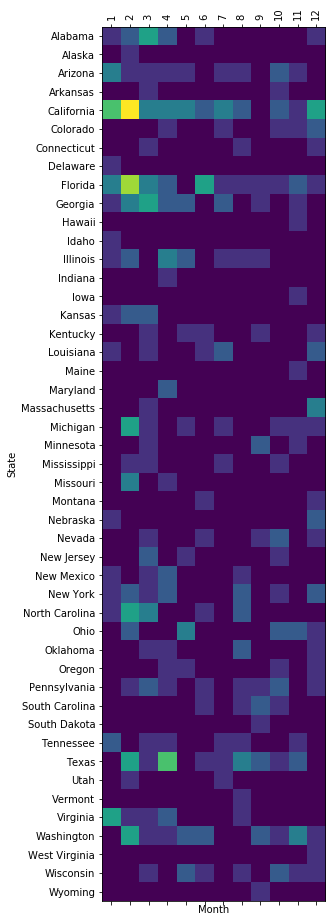

In [10]:
plot_correlation('State', 'Month')